# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. BINTAN DINAR ARTAMEVIA - 1301213227
2. ATHALLA ARLI ABHINAYA - 1301213217

#### Latar Belakang
Dataset yang kami gunakan adalah data liver disorder yang memiliki total tujuh atribut. Lima di antaranya merupakan data tes darah yang dinilai sensitif terhadap kelainan hati karena konsumsi alkohol yang berlebih. Kemudian ada atribut drinks yang merupakan angka konsumsi alkohol perhari. Sisanya merupakan atribut selector yang digunakan untuk memisahkan data menjadi dua set. 

Berdasarkan informasi atribut tersebut, kami ingin memprediksi jumlah konsumsi alkohol perhari berdasarkan kelima data tes darah. Sehingga, metode yang paling cocok digunakan adalah metode ANN karena fitur input dan fitur target memiliki hubungan yang kompleks dan non-linear.

In [2]:
#IMPORT LIBRARY YANG DIGUNAKAN
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

##### EDA & PREPROCESSING

In [3]:
df = pd.read_csv("bupa.data") #MEMBACA DATA
df.columns = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'selector'] #MENAMBAH KOLOM ATRIBUT
print(df)

     mcv  alkphos  sgpt  sgot  gammagt  drinks  selector
0     85       64    59    32       23     0.0         2
1     86       54    33    16       54     0.0         2
2     91       78    34    24       36     0.0         2
3     87       70    12    28       10     0.0         2
4     98       55    13    17       17     0.0         2
..   ...      ...   ...   ...      ...     ...       ...
339   99       75    26    24       41    12.0         1
340   96       69    53    43      203    12.0         2
341   98       77    55    35       89    15.0         1
342   91       68    27    26       14    16.0         1
343   98       99    57    45       65    20.0         1

[344 rows x 7 columns]


In [4]:
#CEK DATA DUPLIKAT
duplicate = df[df.duplicated()]
print(duplicate)

     mcv  alkphos  sgpt  sgot  gammagt  drinks  selector
84    94       58    21    18       26     2.0         2
148   91       63    25    26       15     6.0         1
174   97       71    29    22       52     8.0         1
316   92       80    10    26       20     6.0         1


In [5]:
#DROP DATA YANG DUPLIKAT
df = df.drop(84)
df = df.drop(148)
df = df.drop(174)
df = df.drop(316)

print("CEK DUPLIKAT SETELAH DIDROP")
duplicate_check = df[df.duplicated()]
print(duplicate_check)

print("DATASET TANPA DUPLIKAT")
df = df.reset_index(drop=True) #reset index karena ada beberapa data yang didrop
print(df)

CEK DUPLIKAT SETELAH DIDROP
Empty DataFrame
Columns: [mcv, alkphos, sgpt, sgot, gammagt, drinks, selector]
Index: []
DATASET TANPA DUPLIKAT
     mcv  alkphos  sgpt  sgot  gammagt  drinks  selector
0     85       64    59    32       23     0.0         2
1     86       54    33    16       54     0.0         2
2     91       78    34    24       36     0.0         2
3     87       70    12    28       10     0.0         2
4     98       55    13    17       17     0.0         2
..   ...      ...   ...   ...      ...     ...       ...
335   99       75    26    24       41    12.0         1
336   96       69    53    43      203    12.0         2
337   98       77    55    35       89    15.0         1
338   91       68    27    26       14    16.0         1
339   98       99    57    45       65    20.0         1

[340 rows x 7 columns]


In [6]:
df.describe() #cek deskripsi data

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,90.135294,69.826471,30.470588,24.655882,38.423529,3.441176,1.585294
std,4.450242,18.419943,19.599283,10.129652,39.495454,3.341358,0.493397
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,24.500000,3.000000,2.000000
75%,92.250000,80.000000,34.000000,27.000000,46.250000,5.250000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,2.000000


Scatter Plot

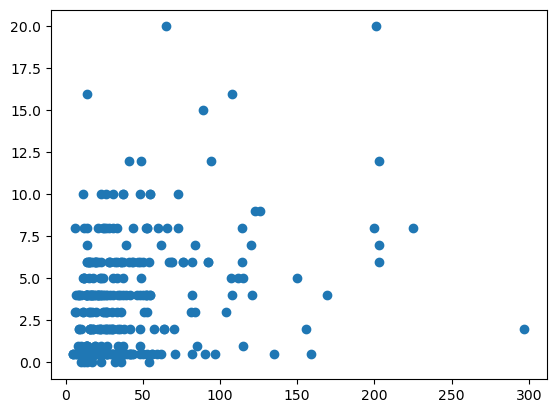

In [7]:
plt.scatter(df['gammagt'], df['drinks']) #melihat hubungan atribut gammagt dan drinks
plt.show()

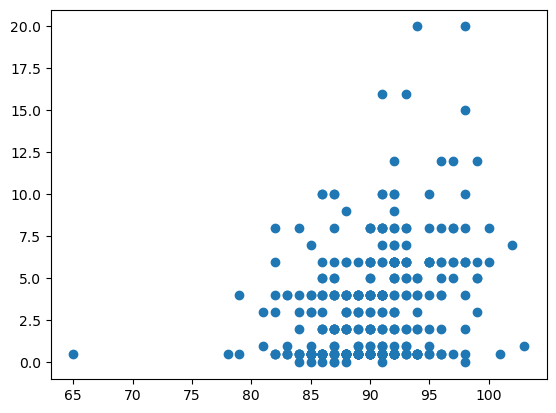

In [8]:
plt.scatter(df['mcv'], df['drinks']) #melihat hubungan atribut mcv dan drinks
plt.show()

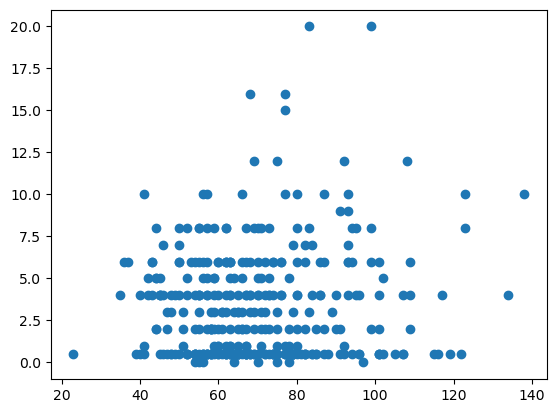

In [9]:
plt.scatter(df['alkphos'], df['drinks'])
plt.show()

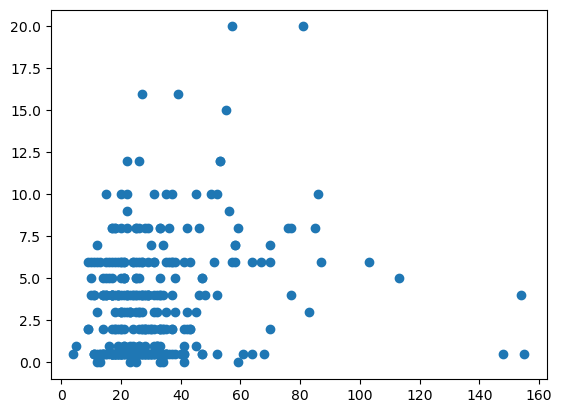

In [10]:
plt.scatter(df['sgpt'], df['drinks'])
plt.show()

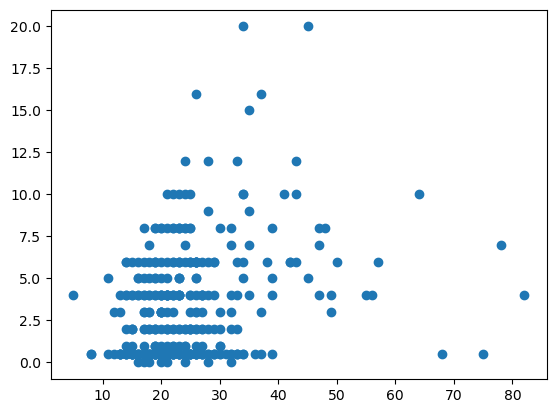

In [11]:
plt.scatter(df['sgot'], df['drinks'])
plt.show()

Menangani outlier

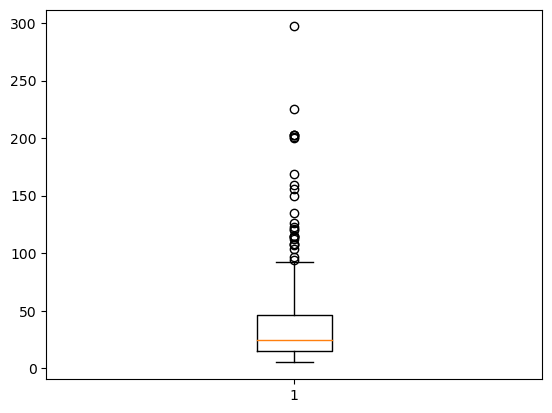

In [12]:
#melihat outlier atribut gammagt dari boxplot
plt.boxplot(df['gammagt'])
plt.show()

In [13]:
#mengganti outlier yang ada di atribut gammagt dengan rata-rata
mean_value = df['gammagt'].mean()
outliers = df[(df['gammagt'] > 100)]
df.loc[outliers.index, 'gammagt'] = mean_value

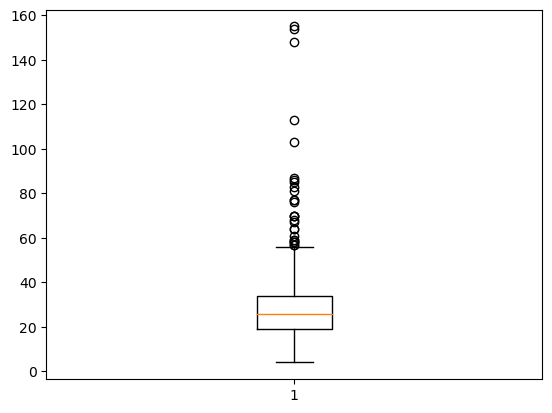

In [14]:
#melihat outlier data sgpt dari boxplot
plt.boxplot(df['sgpt'])
plt.show()

In [15]:
#mengganti outlier sgpt dengan rata-rata
mean_value = df['sgpt'].mean()
outliers = df[(df['sgpt'] > 50)]
df.loc[outliers.index, 'sgpt'] = mean_value

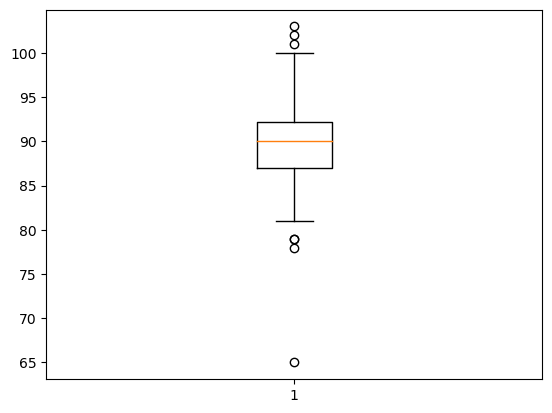

In [16]:
plt.boxplot(df['mcv'])
plt.show()

In [17]:
#mengganti outlier mcv dengan rata-rata
mean_value = df['mcv'].mean()
outliers_max = df[(df['mcv'] > 100)]
df.loc[outliers_max.index, 'mcv'] = mean_value
outliers_min = df[(df['mcv'] < 80)]
df.loc[outliers_min.index, 'mcv'] = mean_value
df.describe()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,90.205727,69.826471,25.788062,24.655882,30.107612,3.441176,1.585294
std,3.939340,18.419943,8.612475,10.129652,19.362095,3.341358,0.493397
min,81.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.750000,57.000000,19.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,24.500000,3.000000,2.000000
75%,92.000000,80.000000,30.470588,27.000000,38.423529,5.250000,2.000000
max,100.000000,138.000000,50.000000,82.000000,97.000000,20.000000,2.000000


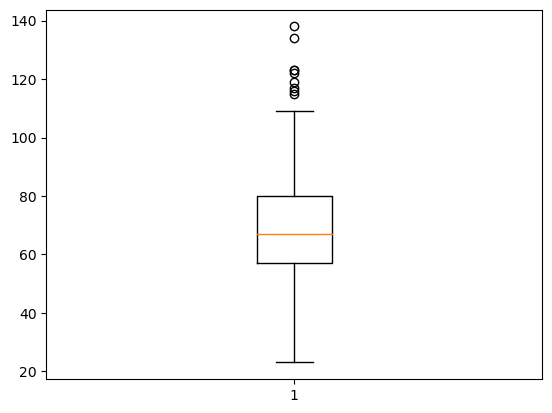

In [18]:
plt.boxplot(df['alkphos'])
plt.show()

In [19]:
#mengganti outlier alkphos dengan rata-rata
mean_value = df['alkphos'].mean()
outliers_max = df[(df['alkphos'] > 110)]
df.loc[outliers_max.index, 'alkphos'] = mean_value
df.describe()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,90.205727,68.418936,25.788062,24.655882,30.107612,3.441176,1.585294
std,3.939340,16.147216,8.612475,10.129652,19.362095,3.341358,0.493397
min,81.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.750000,57.000000,19.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,24.500000,3.000000,2.000000
75%,92.000000,78.000000,30.470588,27.000000,38.423529,5.250000,2.000000
max,100.000000,109.000000,50.000000,82.000000,97.000000,20.000000,2.000000


##### NORMALISASI

In [20]:
#NORMALISASI menggunakan library MinMaxScaler dari sklearn
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print(normalized_df)

          mcv   alkphos      sgpt      sgot   gammagt  drinks  selector
0    0.210526  0.476744  0.575448  0.350649  0.195652    0.00       1.0
1    0.263158  0.360465  0.630435  0.142857  0.532609    0.00       1.0
2    0.526316  0.639535  0.652174  0.246753  0.336957    0.00       1.0
3    0.315789  0.546512  0.173913  0.298701  0.054348    0.00       1.0
4    0.894737  0.372093  0.195652  0.155844  0.130435    0.00       1.0
..        ...       ...       ...       ...       ...     ...       ...
335  0.947368  0.604651  0.478261  0.246753  0.391304    0.60       0.0
336  0.789474  0.534884  0.575448  0.493506  0.363299    0.60       1.0
337  0.894737  0.627907  0.575448  0.389610  0.913043    0.75       0.0
338  0.526316  0.523256  0.500000  0.272727  0.097826    0.80       0.0
339  0.894737  0.883721  0.575448  0.519481  0.652174    1.00       0.0

[340 rows x 7 columns]


#### SPLIT DATA

In [21]:
#MEMISAHKAN DATA TRAIN DAN DATA TEST
df = normalized_df
X = df[['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt']]
y = df['drinks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#### Ringkasan Metode

Metode yang kami gunakan adalah ANN atau Artificial Neural Network. ANN merupakan model komputasi yang memiliki komponen neuron, layer, bobot, dan fungsi aktivasi. Data yang ada akan melewati beberapa layer untuk menghasilkan prediksi yang optimal. Metode yang digunakan di ANN adalah backpropagation untuk menyesuaikan bobot berdasarkan perbedaan antara nilai prediksi dengan nilai aslinya. Selanjutnya juga digunakan algoritma optimasi yang menyesuaikan bobot selama proses training.

MEMBUAT MODEL ANN

In [22]:
#import library tensorflow
import tensorflow as tf

In [23]:
#BASELINE menggunakan 2 layer + 1 layer output dengan fungsi aktivasi relu dan algoritma optimasi adam, perhitungan error menggunakan mean squared error

baseline = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  
]) #membuat model
baseline.compile(optimizer='adam', loss='mean_squared_error') #compile model dengan algoritma adam
baseline.fit(X_train, y_train, epochs=50, batch_size=32) #melatih data sebanyak 50 kali dengan ukuran data 32 tiap iterasinya

predictsBaseline = baseline.predict(X_test) #prediksi nilai dari data test
mseBaseline = np.mean(tf.keras.losses.mean_squared_error(y_test, predictsBaseline)) #menghitung MSE 
print("MSE BASELINE:", mseBaseline)


Epoch 1/50
6/6 [==============================] - 2s 4ms/step - loss: 0.0300
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0285
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0258
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0256
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0243
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0234
Epoch 8/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0226
Epoch 9/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0226
Epoch 10/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0223
Epoch 11/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0219
Epoch 12/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0218
Epoch 13/50
6/6 [==============================] - 0s 5ms/step - loss:

In [24]:
#MODEL 1 menambah layer menjadi 4 dan merubah algoritma optimasi menggunakan gradient descent

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Layer output
])
model1.compile(optimizer='SGD', loss='mean_squared_error') #mengganti algoritma optimasi dengan gradient descent
model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test)) #melatih data train sebanyak 50 kali

predicts1 = model1.predict(X_test)
mse1 = np.mean(tf.keras.losses.mean_squared_error(y_train, predicts1)) #menghitung MSE
print("MSE MDOEL 1: ", mse1)


Epoch 1/50
6/6 [==============================] - 2s 53ms/step - loss: 0.0739 - val_loss: 0.0511
Epoch 2/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0415 - val_loss: 0.0392
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0353 - val_loss: 0.0334
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0326 - val_loss: 0.0322
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0318 - val_loss: 0.0313
Epoch 6/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0313 - val_loss: 0.0308
Epoch 7/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0308 - val_loss: 0.0304
Epoch 8/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0304 - val_loss: 0.0301
Epoch 9/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0303 - val_loss: 0.0295
Epoch 10/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0299 - val_loss: 0.0293
Epoch 11/50
6/6 [==============

In [25]:
#Menambah layer dan mengganti jumlah node di tiap layernya, mengganti fungsi aktivasi menggunakan sigmoid dan tetap menggunakan algoritma optimasi gradient descent

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(75, activation='sigmoid'),
    tf.keras.layers.Dense(50, activation='sigmoid'),
    tf.keras.layers.Dense(25, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Layer output
])
model2.compile(optimizer='SGD', loss='mean_squared_error')
model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

predicts2 = model2.predict(X_test)
mse2 = np.mean(tf.keras.losses.mean_squared_error(y_train, predicts2))
print("MSE MODEL 2: ", mse2)

Epoch 1/50
6/6 [==============================] - 1s 37ms/step - loss: 0.6121 - val_loss: 0.1391
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0835 - val_loss: 0.0404
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0352 - val_loss: 0.0288
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0299 - val_loss: 0.0276
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0294 - val_loss: 0.0267
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0291 - val_loss: 0.0268
Epoch 7/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0291 - val_loss: 0.0271
Epoch 8/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0293 - val_loss: 0.0266
Epoch 9/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0292 - val_loss: 0.0267
Epoch 10/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0292 - val_loss: 0.0269
Epoch 11/50
6/6 [============

In [26]:
#Mengggunakan layer yang sama seperti model 1 tapi mengganti fungsi aktivasi di tiap layernya, menggunakan algoritma optimasi adam

model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='softplus', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Layer output
])
model3.compile(optimizer='adam', loss='mean_squared_error')
model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

predicts3 = model3.predict(X_test)
mse3 = np.mean(tf.keras.losses.mean_squared_error(y_train, predicts3))
print("MSE MODEL 3: ", mse3)

Epoch 1/50
6/6 [==============================] - 1s 30ms/step - loss: 0.0366 - val_loss: 0.0328
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0339 - val_loss: 0.0254
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0286 - val_loss: 0.0254
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0271 - val_loss: 0.0256
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0296 - val_loss: 0.0253
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0273 - val_loss: 0.0242
Epoch 7/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0276 - val_loss: 0.0247
Epoch 8/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0291 - val_loss: 0.0237
Epoch 9/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0284 - val_loss: 0.0239
Epoch 10/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0316 - val_loss: 0.0238
Epoch 11/50
6/6 [================

#### Hasil dan Analisis

1. Baseline
   Menggunakan tiga layer dengan fungsi aktivasi relu dan algoritma optimasi 
   adam. Menghasilkan MSE sebagai berikut setelah dirun 3 kali:
   - MSE 1: 0.03324717
   - MSE 2: 0.033985272
   - MSE 3: 0.033532575

2. MODEL 1
   Menggunakan empat layer dengan fungsi aktivasi relu dan algoritma gradient 
   descent. Menghasilkan MSE sebagai berikut setelah dirun 3 kali:
   - MSE 1: 0.030278593
   - MSE 2: 0.030674495
   - MSE 3: 0.031064792

3. MODEL 2
   Menggunakan lima layer dengan jumlah node yang berbeda dibanding model 1 
   dan model 2. Menggunakan fungsi aktivasi sigmoid dan algoritma optimasi 
   gradient descent. Menghasilkan MSE sebagai berikut setelah dirun 3 kali:
   - MSE 1: 0.02919702
   - MSE 2: 0.02908951
   - MSE 3: 0.029136928

4. MODEL 3
   Menggunakan empat layer dengan node yang sama dengan model 1 tetapi 
   menggunakan fungsi aktivasi yang berbeda di tiap layernya. Menggunakan 
   algoritma optimasi gradient descent. Menghasilkan MSE sebagai berikut 
   setelah dirun 3 kali:
   - MSE 1: 0.029274251
   - MSE 2: 0.032699857
   - MSE 3: 0.03037138
   

#### Kesimpulan
   
Sehingga, berdasarkan ketiga model yang dijalani, model yang menghasilkan MSE paling kecil adalah model dua yang menggunakan fungsi aktivasi sigmoid, algoritma gradient descent, dan menggunakan layer paling banyak, yaitu lima. Walaupun begitu, antara ketiga model tersebut, MSE yang diperoleh juga tidak berbeda jauh sehingga ketiga model tersebut tidak menghasilkan hasil yang signifikan terhadap prediksinya. Namun, dibandingkan dengan baseline, ketiga model tersebut seluruhnya memiliki hasil MSE yang lebih kecil dibandingkan baseline.
